In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat,unumpy
from decimal import *
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('dados.csv')

In [3]:
df.head

<bound method NDFrame.head of        V(V)         I(ma)  Fundo Escala:Tensão (V)  Fundo Escala:Corrente (mA)
0   0.90150  1.020000e+00                      2.0                     10.0000
1   0.89280  9.100000e-01                      2.0                     10.0000
2   0.88650  8.300000e-01                      2.0                     10.0000
3   0.88150  7.400000e-01                      2.0                     10.0000
4   0.87150  6.300000e-01                      2.0                     10.0000
5   0.86510  5.500000e-01                      2.0                     10.0000
6   0.85400  4.300000e-01                      2.0                     10.0000
7   0.84200  3.400000e-01                      2.0                     10.0000
8   0.82740  2.300000e-01                      2.0                     10.0000
9   0.81830  1.411000e-01                      2.0                      0.2000
10  0.81610  1.362000e-01                      2.0                      0.2000
11  0.81050  1.213000e

### Criando a tabela com cada escala

In [4]:
# Incerteza tensao
df20 = df[df['Fundo Escala:Tensão (V)'] == 20]
df2 = df[df['Fundo Escala:Tensão (V)'] == 2]
df02 = df[df['Fundo Escala:Tensão (V)'] == 0.2]


### Calculando a incerteza do potencial

In [5]:
# Incerteza para o potencial
df20['dV(V)'] = np.round(abs(df20['V(V)'] * (0.05/100)) + 3* 10**(-3),3)
df2['dV(V)'] = np.round(abs(df2['V(V)'] * (0.05/100)) + 3* 10**(-4),4)
df02['dV(V)'] = np.round(abs(df02['V(V)'] * (0.05/100)) + 3* 10**(-5),5)
# df20.head(10)

In [6]:
# df2.head() Correto
df02.head(10)

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA),dV(V)
22,0.12920,0.0,0.2,0.0002,0.00009
23,0.09616,0.0,0.2,0.0002,0.00008
24,0.04472,0.0,0.2,0.0002,0.00005
25,-0.02260,0.0,0.2,0.0002,0.00004
26,-0.10154,0.0,0.2,0.0002,0.00008
27,-0.15412,0.0,0.2,0.0002,0.00011


### Calculando a incerteza para a corrente

In [7]:
# Incerteza corrente
dfi1 = df[df['Fundo Escala:Corrente (mA)'] == 10]
dfi2 = df[df['Fundo Escala:Corrente (mA)'] == 0.2]
dfi3 = df[df['Fundo Escala:Corrente (mA)'] == 0.02]
dfi4 = df[df['Fundo Escala:Corrente (mA)'] == 0.002]
dfi5 = df[df['Fundo Escala:Corrente (mA)'] == 0.0002]

In [8]:
dfi1.head()

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA)
0,0.9015,1.02,2.0,10.0
1,0.8928,0.91,2.0,10.0
2,0.8865,0.83,2.0,10.0
3,0.8815,0.74,2.0,10.0
4,0.8715,0.63,2.0,10.0


In [9]:
# Incerteza para a corrente
#1) olhar a formula 
#2) numero de casas da medida 

dfi1['dI(A)'] = np.round(abs(dfi1['I(ma)'] * (2/100)) + 10* 10**(-3),3)
dfi2['dI(A)'] = np.round(abs(dfi2['I(ma)'] * (2/100)) + 2* 10**(-4),4)
dfi3['dI(A)'] = np.round(abs(dfi3['I(ma)'] * (1.8/100)) + 2* 10**(-5),5)
dfi4['dI(A)'] = np.round(abs(dfi4['I(ma)'] * (1.8/100)) + 2* 10**(-6),6)
dfi5['dI(A)'] = np.round(abs(dfi5['I(ma)'] * (1.8/100)) + 2* 10**(-7),7)

#print(dfi5['dI(A)'])


In [10]:
df_new1 = pd.concat([df20,df2,df02])
df_new2 = pd.concat([dfi1,dfi2,dfi3,dfi4,dfi5])
df_new3 = pd.concat([df_new1,df_new2['dI(A)']],axis=1,sort=True)

In [11]:
df_new3.head(30)

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA),dV(V),dI(A)
0,0.90150,1.020000,2.0,10.0000,0.00080,3.000000e-02
1,0.89280,0.910000,2.0,10.0000,0.00070,2.800000e-02
2,0.88650,0.830000,2.0,10.0000,0.00070,2.700000e-02
3,0.88150,0.740000,2.0,10.0000,0.00070,2.500000e-02
4,0.87150,0.630000,2.0,10.0000,0.00070,2.300000e-02
5,0.86510,0.550000,2.0,10.0000,0.00070,2.100000e-02
6,0.85400,0.430000,2.0,10.0000,0.00070,1.900000e-02
7,0.84200,0.340000,2.0,10.0000,0.00070,1.700000e-02
8,0.82740,0.230000,2.0,10.0000,0.00070,1.500000e-02
9,0.81830,0.141100,2.0,0.2000,0.00070,3.000000e-03


Text(0.5, 0, 'I(a)')

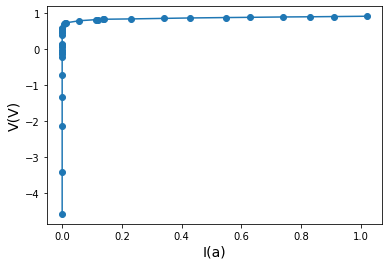

In [12]:
plt.scatter(df['I(ma)'],df['V(V)'])
plt.plot(df['I(ma)'],df['V(V)'])
plt.ylabel('V(V)', fontsize=14)
plt.xlabel('I(a)', fontsize=14)

In [13]:
# Calculo da escala 
print(df['V(V)'].max())
print(df['V(V)'].min())
print(df['I(ma)'].max())
print(df['I(ma)'].min())

0.9015
-4.586
1.02
0.0


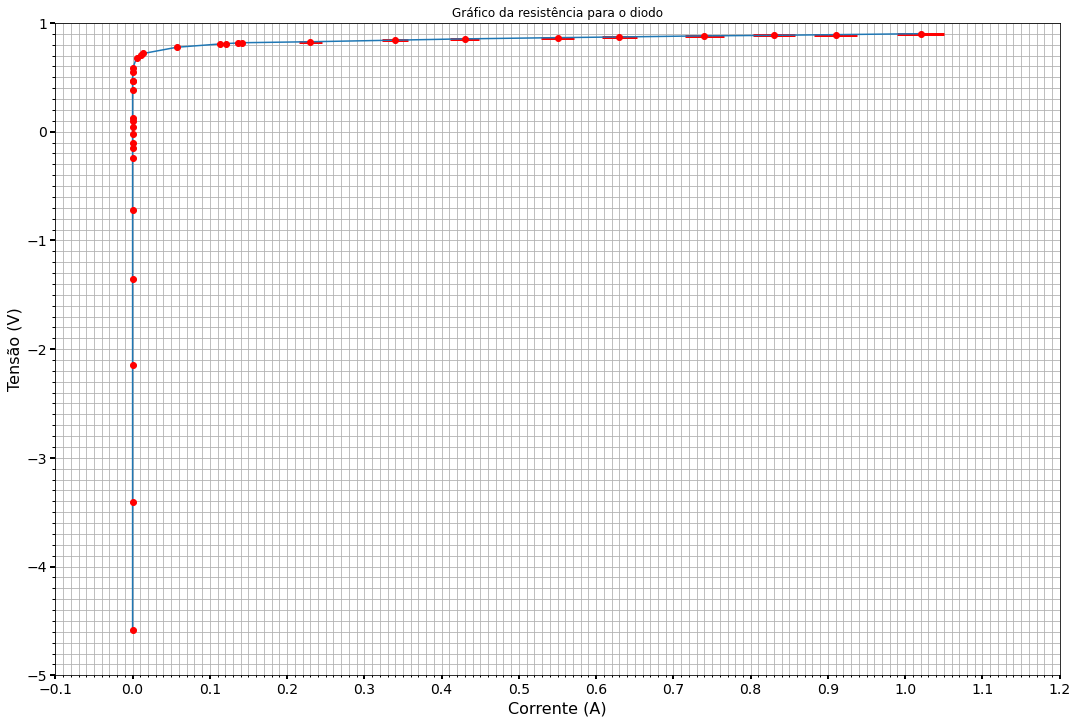

In [14]:
#ax=plt.axes()
fig, ax = plt.subplots(figsize=(18,12))

plt.plot(df['I(ma)'],df['V(V)'])
plt.errorbar(df_new3['I(ma)'], df_new3['V(V)'], yerr=df_new3['dV(V)'], xerr=df_new3['dI(A)'], fmt='o',elinewidth=3,color='red')

#plt.scatter(df['I(ma)'],df['V(V)'])
#plt.plot(df['I(ma)'],df['V(V)'])

plt.xlabel('Corrente (A)',fontsize=16)
plt.ylabel('Tensão (V)', fontsize=16)

#Título:
plt.title('Gráfico da resistência para o diodo')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
plt.ylim(-5,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=14)
plt.xlim([-0.1,1.2])
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')
# plt.savefig('VxI', dpi='figure')
# plt.savefig('VxI.svg', dpi=1200)

plt.grid(which='both')
# plt.grid()
plt.savefig('VxI.pdf', dpi=1200)

plt.show()


In [15]:
# df2_tidy = df2_melted.rename(columns = {'variable': 'Year', 'value': 'Income'}, inplace = False)

In [16]:
df_new3.head()

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA),dV(V),dI(A)
0,0.9015,1.02,2.0,10.0,0.0008,0.030
1,0.8928,0.91,2.0,10.0,0.0007,0.028
2,0.8865,0.83,2.0,10.0,0.0007,0.027
3,0.8815,0.74,2.0,10.0,0.0007,0.025
4,0.8715,0.63,2.0,10.0,0.0007,0.023


In [17]:
#df_new3 = df_new3.rename(columns= {'I(ma)':'I(A)','Fundo Escala:Corrente (mA)':'Fundo Escala:Corrente (A)', 'dV(V)': r'$\Delta$V(V)', 'dI(A)':r'$\Delta$I(A)' }, inplace=False)

In [18]:
df_new3

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA),dV(V),dI(A)
0,0.90150,1.020000e+00,2.0,10.0000,0.00080,3.000000e-02
1,0.89280,9.100000e-01,2.0,10.0000,0.00070,2.800000e-02
2,0.88650,8.300000e-01,2.0,10.0000,0.00070,2.700000e-02
3,0.88150,7.400000e-01,2.0,10.0000,0.00070,2.500000e-02
4,0.87150,6.300000e-01,2.0,10.0000,0.00070,2.300000e-02
5,0.86510,5.500000e-01,2.0,10.0000,0.00070,2.100000e-02
6,0.85400,4.300000e-01,2.0,10.0000,0.00070,1.900000e-02
7,0.84200,3.400000e-01,2.0,10.0000,0.00070,1.700000e-02
8,0.82740,2.300000e-01,2.0,10.0000,0.00070,1.500000e-02
9,0.81830,1.411000e-01,2.0,0.2000,0.00070,3.000000e-03


In [19]:
df_new3 = df_new3.rename(columns= {'I(ma)':'I(A)','Fundo Escala:Corrente (mA)':'Fundo Escala:Corrente (A)', 'dV(V)': 'ΔV(V)', 'dI(A)':'ΔI(A)'}, inplace=False)

In [20]:
df_new3.head()

,V(V),I(A),Fundo Escala:Tensão (V),Fundo Escala:Corrente (A),ΔV(V),ΔI(A)
0,0.9015,1.02,2.0,10.0,0.0008,0.030
1,0.8928,0.91,2.0,10.0,0.0007,0.028
2,0.8865,0.83,2.0,10.0,0.0007,0.027
3,0.8815,0.74,2.0,10.0,0.0007,0.025
4,0.8715,0.63,2.0,10.0,0.0007,0.023


In [21]:
df_new3.to_csv('dados-final.csv')